In [1]:
import os
from os.path import exists

import re
import numpy as np

import pandas as pd 
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
path_rasa_list = '/Users/rhythmjain/GT-files/2-2/CompMus/ComputationalMusicology-TheRagaGuide/RagaList.xlsx'
raga_rasa = pd.read_excel(path_rasa_list)[['Raga', 'FileName', 'Vadi', 'Samvadi', 'Rasa', 'ALT_Rasa', 'ALT_Rasa2']]

display(raga_rasa)
display(raga_rasa.groupby(['Rasa']).count().sort_values('Raga', ascending=False))

,Raga,FileName,Vadi,Samvadi,Rasa,ALT_Rasa,ALT_Rasa2
0,Abhogi,Abhogi_D1T1.txt,Sa,Ma,Virah,Karuna,Karuna
1,Adana,Adana_D1T2.txt,Sa,Pa,Veer,Veer,Other
2,Ahir Bhairav,Ahir_bhairav_D1T3.txt,Ma,Sa,Bhakti,Bhakti,Bhakti
3,Alhaiya bilaval,Alhaiya_bilaval_D1T4.txt,Dha,Ga,Adbhut,Adbhut,Other
4,Asavari,Asavari_D1T5.txt,Komal Dha,Komal Ga,Bhakti,Bhakti,Bhakti
...,...,...,...,...,...,...,...
69,Sohini,sohini.txt,Dha,Ga,Karuna,Karuna,Karuna
70,Sur Malhar,sur_malhar.txt,Ma,Sa,Adbhut,Adbhut,Other
71,Tilak Kamod,tilak_kamod.txt,Sa,Pa,Hasya,Hasya,Other
72,Tilang,tilang.txt,Ga,Komal Ni,Shringar,Shringar,Shringar


,Raga,FileName,Vadi,Samvadi,ALT_Rasa,ALT_Rasa2
Rasa,,,,,,
Shringar,33,33,33,33,33,33
Bhakti,11,11,11,11,11,11
Karuna,7,7,7,7,7,7
Adbhut,5,5,5,5,5,5
Veer,5,5,5,5,5,5
Raudra,4,4,4,4,4,4
Virah,3,3,3,3,3,3
Hasya,2,2,2,2,2,2
Shaant,2,2,2,2,2,2


### Pre and post balancing


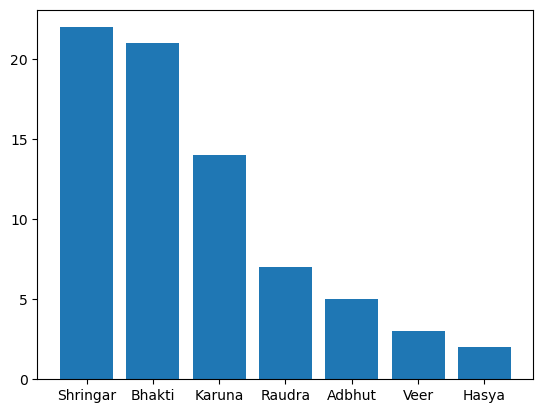

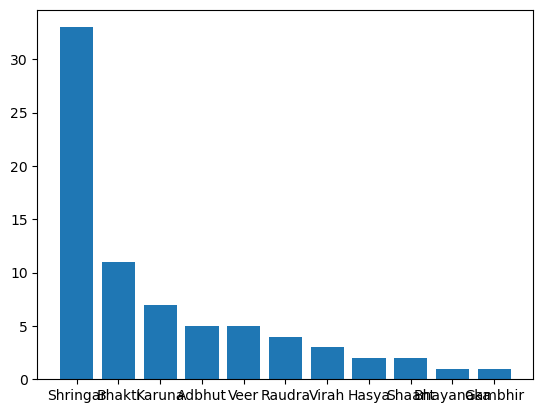

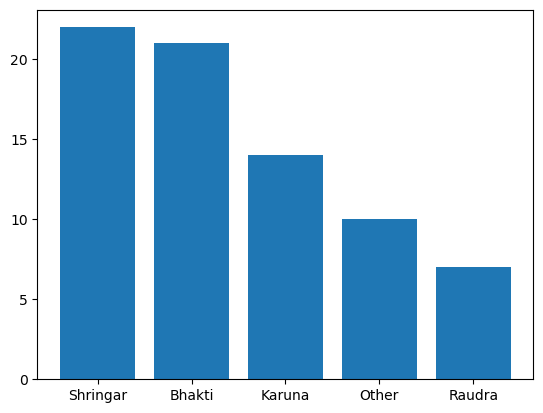

In [440]:
#Pre and post balancing

old = raga_rasa.groupby(['Rasa']).count().sort_values('Raga', ascending=False)

new = raga_rasa.groupby(['ALT_Rasa']).count().sort_values('Raga', ascending=False)

new_with_other = raga_rasa.groupby(['ALT_Rasa2']).count().sort_values('Raga', ascending=False)


alt_rasa_tally =  new[['Raga']]
plt.bar(np.arange(0, 7, 1),alt_rasa_tally.values.flatten())
plt.xticks(np.arange(0, 7, 1), new[['Raga']].index)

plt.show()

old_rasa_tally =  old[['Raga']]
plt.bar(np.arange(0, len(old), 1),old_rasa_tally.values.flatten())
plt.xticks(np.arange(0, len(old), 1), old[['Raga']].index)

plt.show()


new_with_other_rasa_tally =  new_with_other[['Raga']]
plt.bar(np.arange(0, len(new_with_other), 1),new_with_other_rasa_tally.values.flatten())
plt.xticks(np.arange(0, len(new_with_other), 1), new_with_other[['Raga']].index)

plt.show()

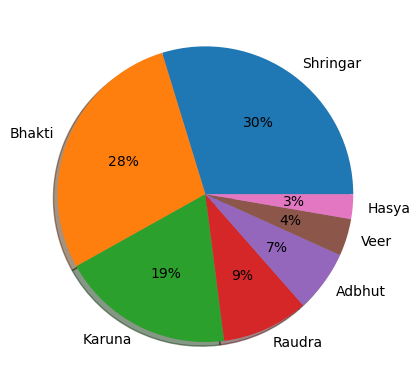

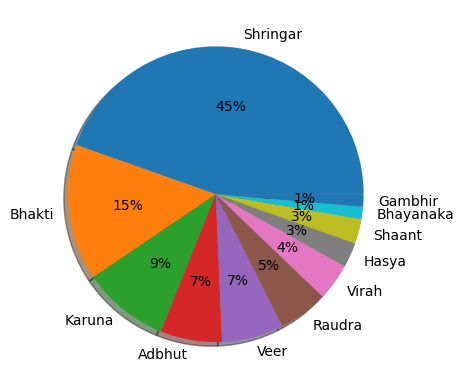

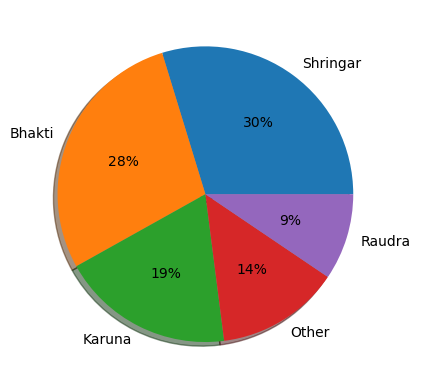

In [441]:
#Pre and post balancing

x=alt_rasa_tally.values.flatten()
plt.pie(x, labels=new[['Raga']].index, autopct='%1.f%%',
        shadow=True,textprops={"fontsize":10})
plt.savefig('imgs/post_balance.png')
plt.show()


x=old_rasa_tally.values.flatten()
plt.pie(x, labels=old[['Raga']].index, autopct='%1.f%%',
        shadow=True, textprops={"fontsize":10})
plt.savefig('imgs/pre_balance.png')
plt.show()

x=new_with_other_rasa_tally.values.flatten()
plt.pie(x, labels=new_with_other[['Raga']].index, autopct='%1.f%%',
        shadow=True, textprops={"fontsize":10})
plt.savefig('imgs/post_balance_with_other.png')

plt.show()


In [423]:
display(old)
display(new)
display(new_with_other)


,Raga,FileName,Vadi,Samvadi,ALT_Rasa,ALT_Rasa2
Rasa,,,,,,
Shringar,33,33,33,33,33,33
Bhakti,11,11,11,11,11,11
Karuna,7,7,7,7,7,7
Adbhut,5,5,5,5,5,5
Veer,5,5,5,5,5,5
Raudra,4,4,4,4,4,4
Virah,3,3,3,3,3,3
Hasya,2,2,2,2,2,2
Shaant,2,2,2,2,2,2


,Raga,FileName,Vadi,Samvadi,Rasa,ALT_Rasa2
ALT_Rasa,,,,,,
Shringar,22,22,22,22,22,22
Bhakti,21,21,21,21,21,21
Karuna,14,14,14,14,14,14
Raudra,7,7,7,7,7,7
Adbhut,5,5,5,5,5,5
Veer,3,3,3,3,3,3
Hasya,2,2,2,2,2,2


,Raga,FileName,Vadi,Samvadi,Rasa,ALT_Rasa
ALT_Rasa2,,,,,,
Shringar,22,22,22,22,22,22
Bhakti,21,21,21,21,21,21
Karuna,14,14,14,14,14,14
Other,10,10,10,10,10,10
Raudra,7,7,7,7,7,7


## Making dataframes per rasa

In [3]:
shringar = raga_rasa.loc[raga_rasa['ALT_Rasa']=='Shringar'].reset_index()

In [4]:
karuna = raga_rasa.loc[raga_rasa['ALT_Rasa'].isin(['Karuna', 'Virah'])].reset_index()


In [5]:
bhakti = raga_rasa.loc[raga_rasa['ALT_Rasa'].isin(['Bhakti', 'Shaant'])].reset_index()

In [6]:
raudra = raga_rasa.loc[raga_rasa['ALT_Rasa'].isin(['Raudra', 'Gambhir', 'Bhayanaka'])].reset_index()
raudra

,index,Raga,FileName,Vadi,Samvadi,Rasa,ALT_Rasa,ALT_Rasa2
0,45,Malkauns,Malkauns_D3T10.txt,Ma,Sa,Raudra,Raudra,Raudra
1,56,Puriya,puriya.txt,Ga,Ni,Raudra,Raudra,Raudra
2,57,Puriya dhanashri,puriya_dhanashri.txt,Pa,Sa,Raudra,Raudra,Raudra
3,58,Puriya kalyan,puriya_kalyan.txt,Sa,Pa,Gambhir,Raudra,Raudra
4,63,Shankara,shankara.txt,Ga,Ni,Raudra,Raudra,Raudra
5,64,Shri,shri.txt,Komal Re,Pa,Bhayanaka,Raudra,Raudra
6,66,Shuddh Sarang,shuddh_sarang.txt,Re,Pa,Shringar,Raudra,Raudra


In [7]:
others = raga_rasa.loc[raga_rasa['ALT_Rasa'].isin(['Hasya', 'Adbhut', 'Veer'])].reset_index()

### Swara distribution

In [41]:
from scipy.stats import wasserstein_distance as wd

def get_token_tallies(file):
    if exists(file)==False:
        return -1
    with open(file, 'r') as f:
        lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].strip()
    return lines
    
def get_swara_distribution_per_raga(rasa_dataframe):
   
    raga_names = []
    rasa_swara_distribution_per_raga = np.zeros((len(rasa_dataframe), 12))
#     print(rasa_swara_distribution_per_raga)
    for i in rasa_dataframe.index:
        path = 'Analysis/deg_files/'+str(rasa_dataframe['FileName'].loc[i])+'.deg'
        rasa_lines = get_token_tallies(path)
        if rasa_lines == -1:
            continue
        raga_names.append(rasa_dataframe['Raga'].loc[i])
        rasa_lines = [line for line in rasa_lines if not re.search(r'[\*!]', line)]
        scale_deg_dist_rasa = make_corr_arrays(rasa_lines)
        rasa_swara_distribution_per_raga[i] = scale_deg_dist_rasa
#     print(rasa_swara_distribution_per_raga)
    return rasa_swara_distribution_per_raga, raga_names
def plot_hist(file_with_lines):
    
    w = Counter(file_with_lines)
    w = OrderedDict(sorted(w.items()))
    
    plt.rcParams["figure.figsize"] = (20,3)
    plt.bar(w.keys(), w.values())
    plt.show()

def make_corr_arrays(file_with_lines):
    scale = ['1', '2-', '2', '3-', '3', '4', '4+', '5', '6-', '6', '7-', '7']
    w = Counter(file_with_lines)
    scale_degree_frequency=np.zeros(12)
    for i in range(len(scale)):
        if scale[i] in w.keys():
            scale_degree_frequency[i] = w[scale[i]]
        
    return scale_degree_frequency.astype(int)

def plot_heatmap(ndarray, raga_names, rasa_name):
    plt.figure(figsize=(14, 14))
    heatmap = sns.heatmap(ndarray, annot=True, vmin=np.min(ndarray), vmax=np.max(ndarray), 
                          cmap="crest",linewidth=.5, 
                          xticklabels = raga_names,
                          yticklabels = raga_names);
    title = 'Earth Movers distance : '+ str(len(raga_names)) +' ragas from '+rasa_name+' rasa'

    heatmap.set_title(title,
                      fontdict={'fontsize':16}, pad=12);

    heatmap.set_xlabel('Ragas', fontsize=16)
    heatmap.set_ylabel('Ragas', fontsize=16)
    plt.show()
    
def plot_colormap(ndarray, raga_names, rasa_name):
    heatmap = sns.clustermap(ndarray, 
                             annot=True, 
                             xticklabels = raga_names,
                             yticklabels = raga_names, figsize=(10, 10))
    heatmap.xlabel('Ragas', fontsize=16)
    heatmap.ylabel('Ragas', fontsize=16)
    plt.show()
    
    
def func(rasa_df, rasa_name, heatmap=False, clustermap = False):
    print(rasa_name)
    rasa_swara_distribution_per_raga, raga_names = get_swara_distribution_per_raga(rasa_df)
#     if rasa_name == 'raudra':
#         print(rasa_swara_distribution_per_raga)
    
    l = len(rasa_swara_distribution_per_raga)
    dist=np.zeros((l,l))
   
    for i in range(len(rasa_swara_distribution_per_raga)):
        p=rasa_swara_distribution_per_raga[i]
        for j in range(len(rasa_swara_distribution_per_raga)):
            q=rasa_swara_distribution_per_raga[j]
            dist[i][j] = wd(p,q)
#             if rasa_name == 'raudra':
#                 print(f"{p}\n{q}, \ndistance:{np.round(wd(p,q), 2)}")
    
    if heatmap == True:
        plot_heatmap(dist, raga_names, rasa_name)
    if clustermap == True:
        plot_heatmap(dist, raga_names, rasa_name)
    return dist

shringar


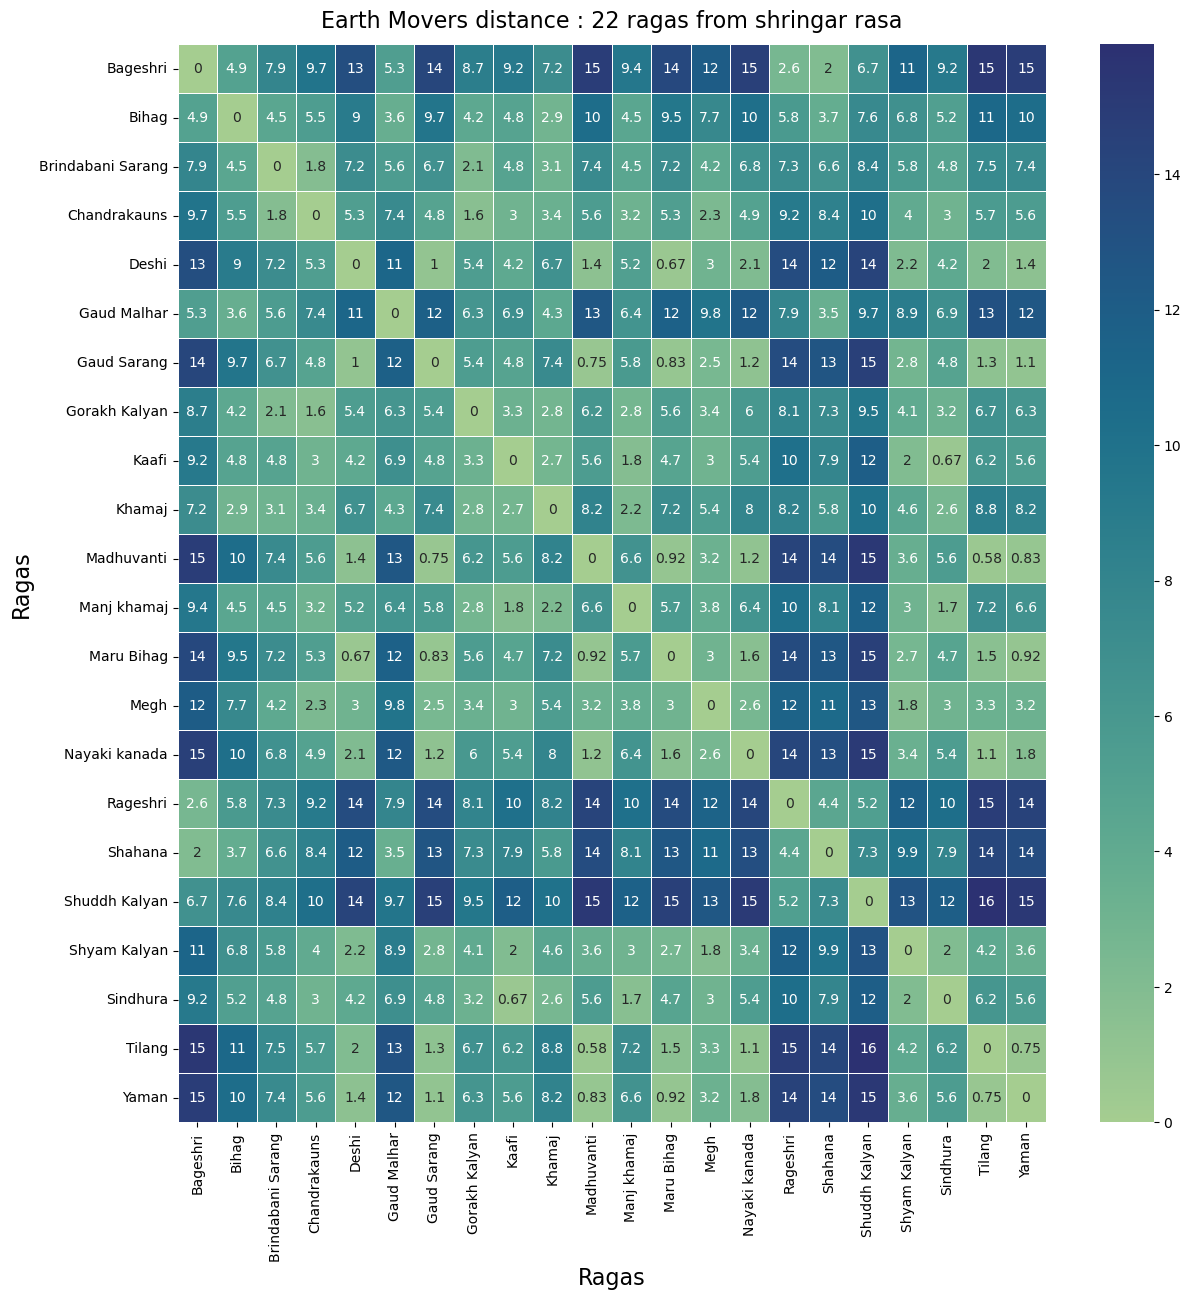

karuna


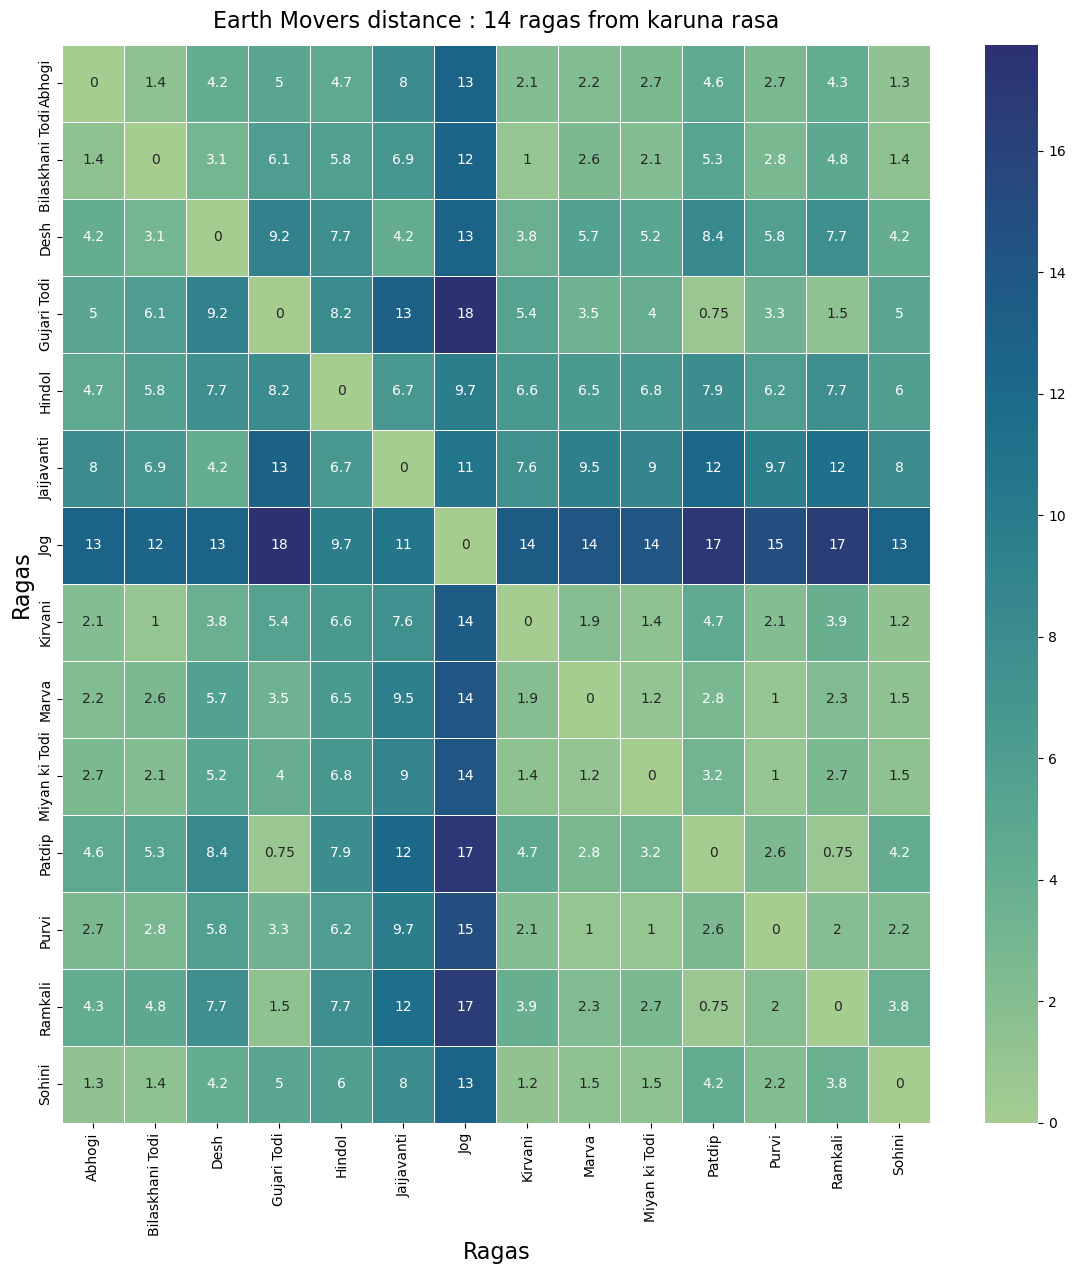

bhakti


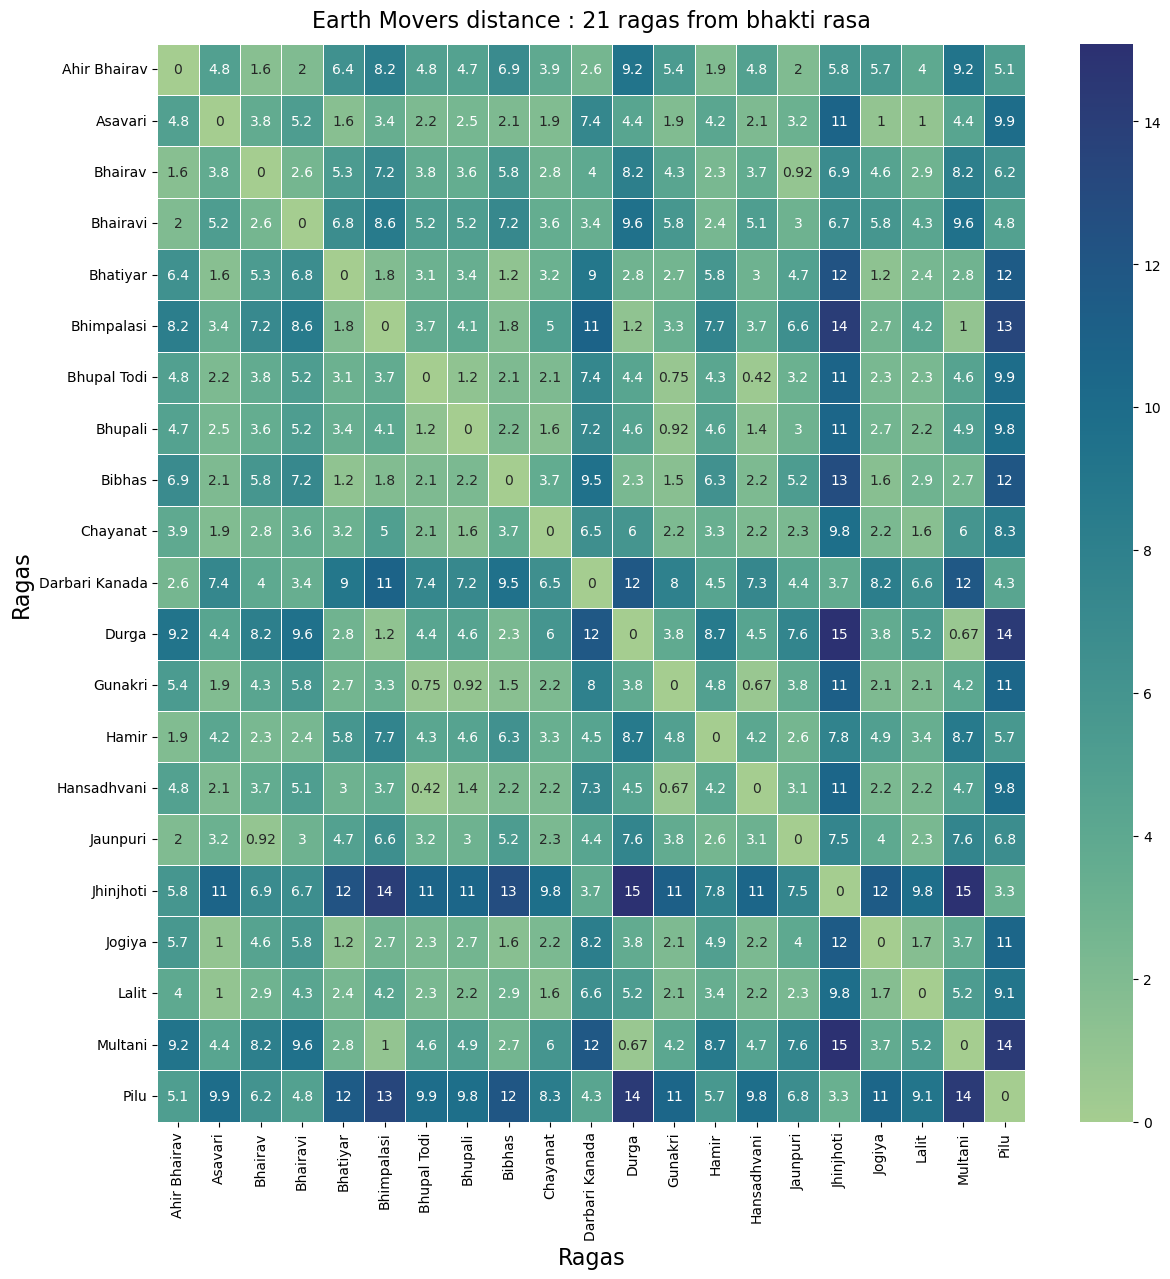

raudra


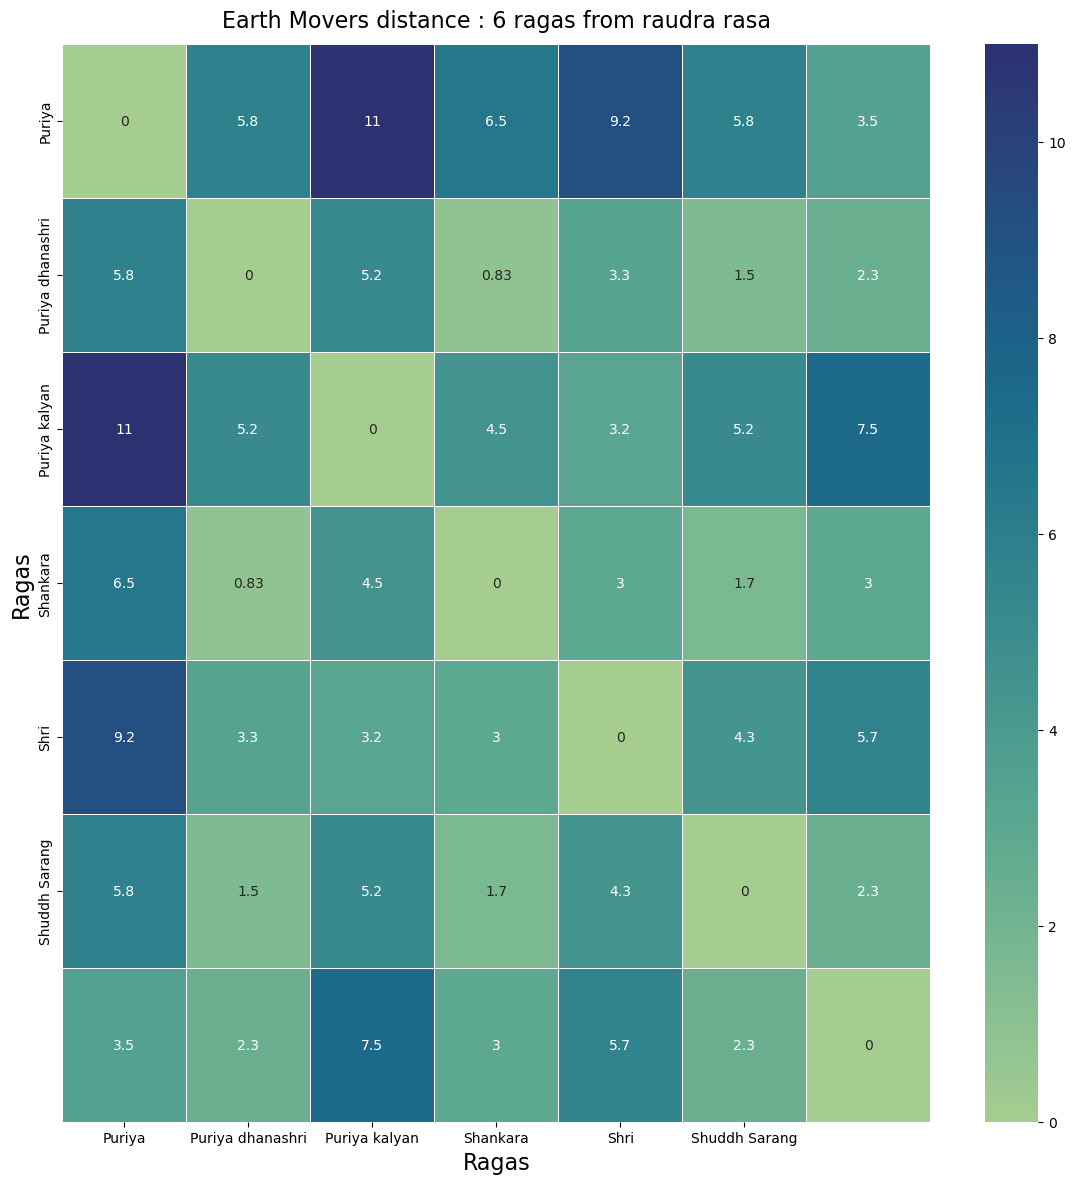

others


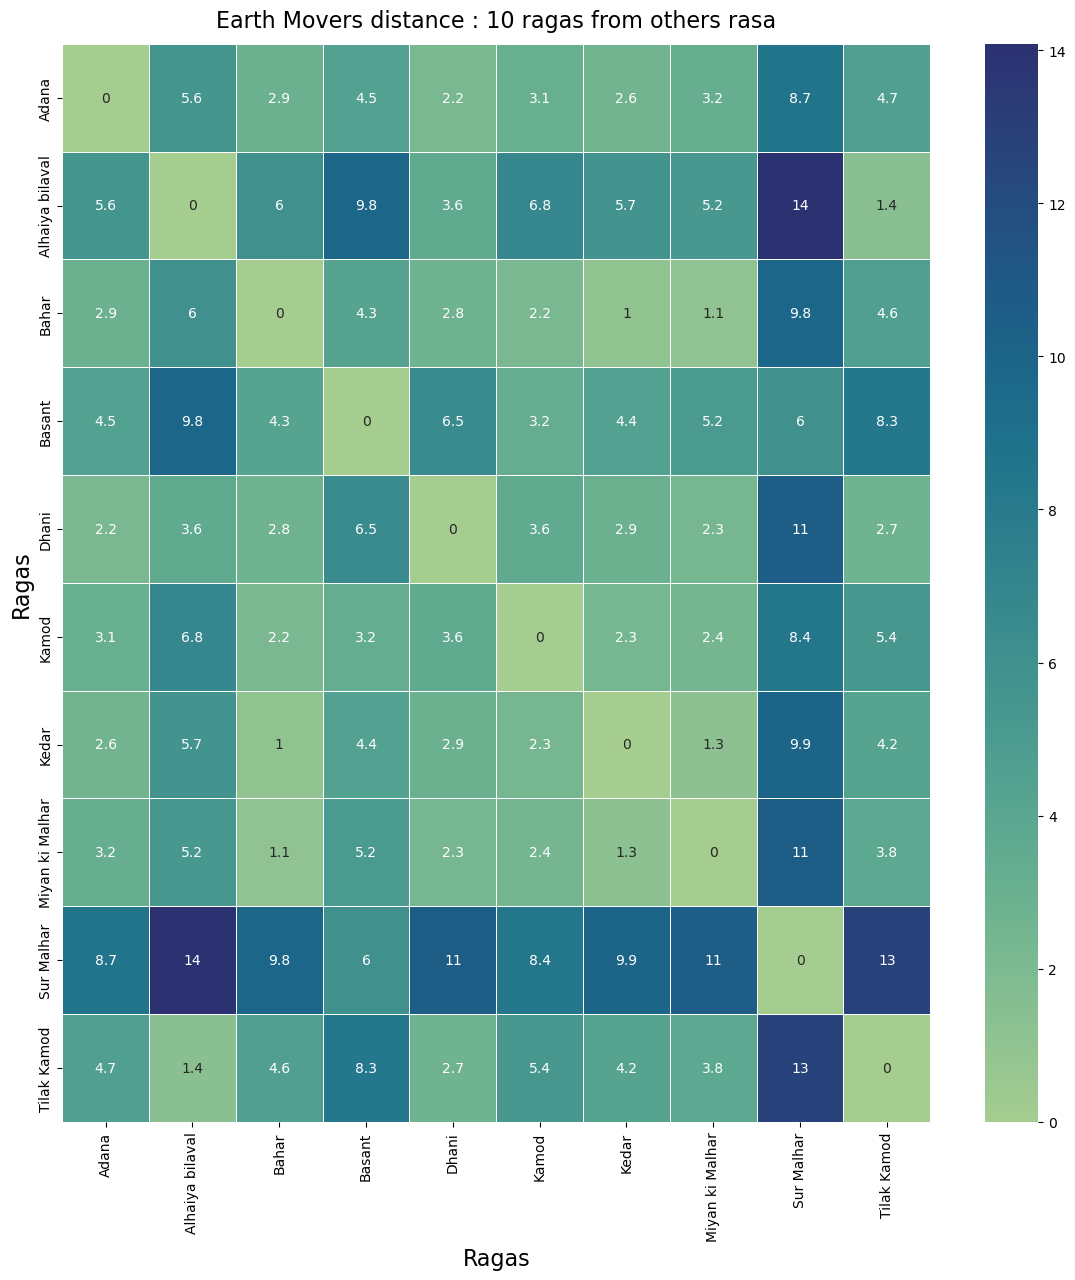

In [42]:
rasa_groups = ['shringar', 'karuna', 'bhakti', 'raudra', 'others']
rasa_df_arr = [shringar, karuna, bhakti, raudra, others]
dists = []
for i in range(len(rasa_groups)):
    dists.append(func(rasa_df_arr[i],rasa_groups[i], heatmap=True))
dists_np = np.array(dists)     

## Monte Carlo random sampling

0


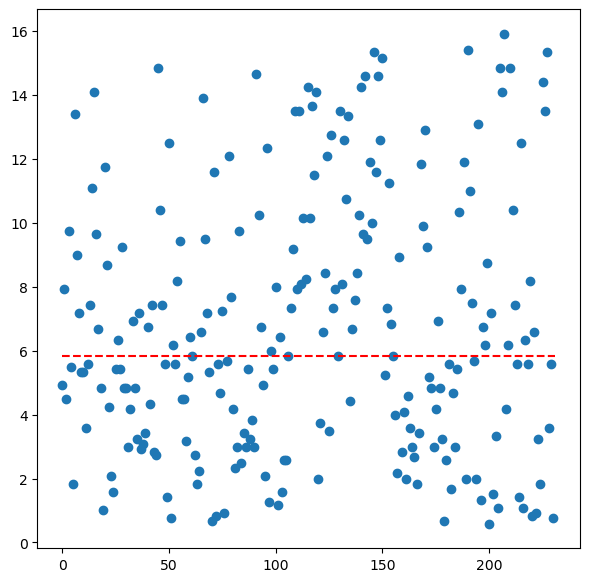

1


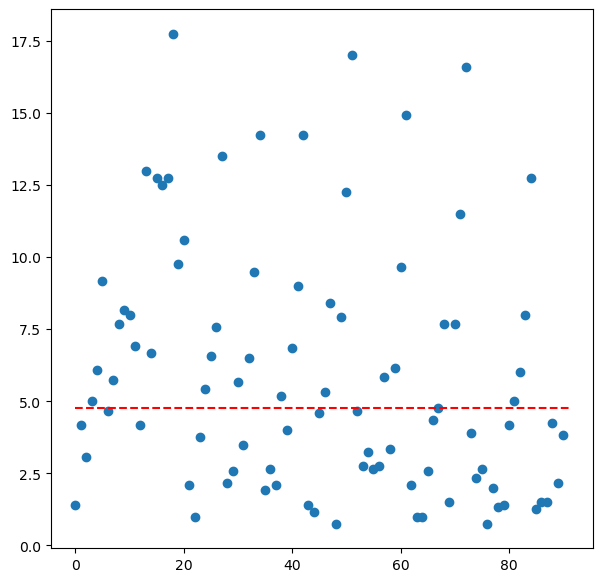

2


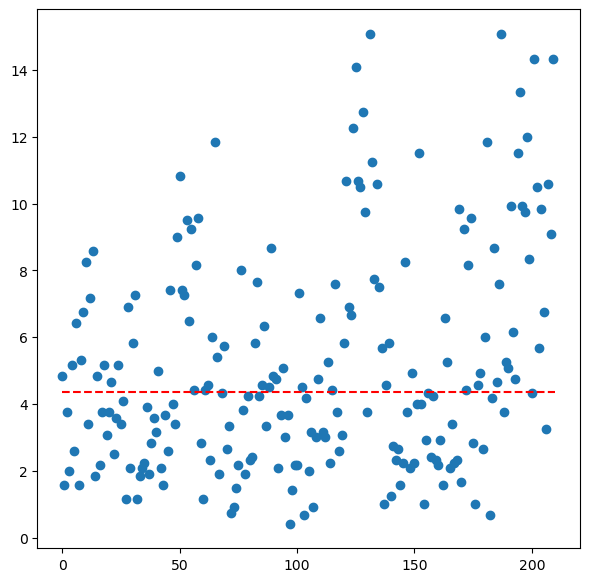

3


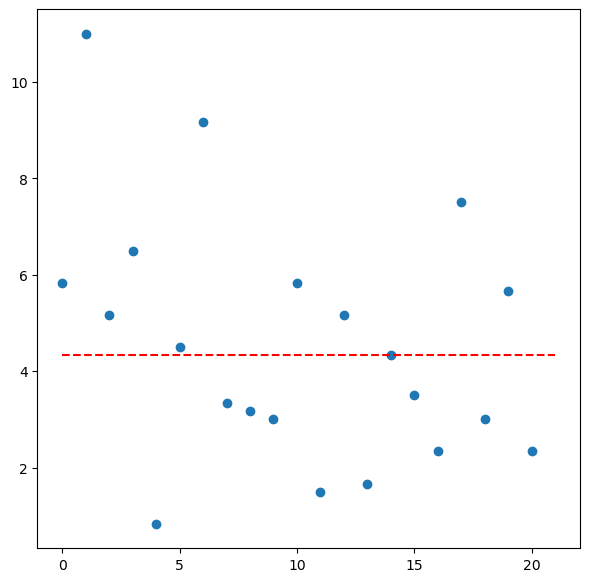

4


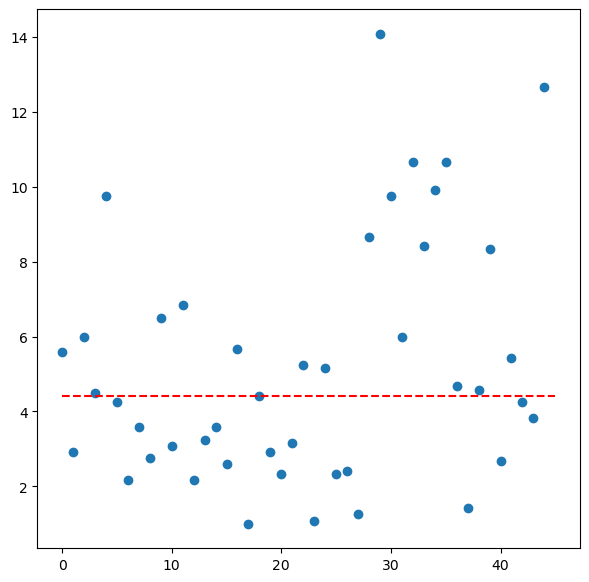

In [43]:
med = []
lower_triangles = []

for i in range(len(dists_np)):
    print(i)
    plt.figure(figsize=(7,7))
    
    plotting = dists_np[i][np.tril(dists_np[i])!=0]
    med.append(np.median(plotting))
    lower_triangles.append(plotting)
    plt.plot(plotting, 'o')
    plt.hlines(y=np.median(plotting), xmin=0,xmax=len(plotting), color = 'red', linestyles='dashed')    
    plt.show()

## Chi Square between Vadi, Samavadi and Rasas

Rasa


Rasa,Bhakti,Karuna,Other,Raudra,Shringar
Vadi,,,,,
Dha,1,2,1,0,0
Ga,3,1,0,2,7
Komal Dha,6,3,0,0,0
Komal Ga,0,0,1,0,1
Komal Re,0,1,0,1,0
Ma,7,1,3,1,5
Pa,1,3,2,1,6
Re,2,2,0,1,1
Sa,1,1,3,1,2


Rasa,Bhakti,Karuna,Other,Raudra,Shringar
Samvadi,,,,,
Dha,1,1,0,0,2
Ga,1,2,1,0,0
Komal Ga,3,2,0,0,0
Komal Ni,1,0,1,0,4
Komal Re,3,1,0,0,0
Ma,0,1,0,0,0
Ni,1,1,0,2,2
Pa,3,2,3,3,3
Re,0,0,1,0,0


Vadi and Rasa: 0.10341244651905433 32 42.399200472729895
Samvadi and Rasa: 0.24680251464761266 36 41.397673782156545


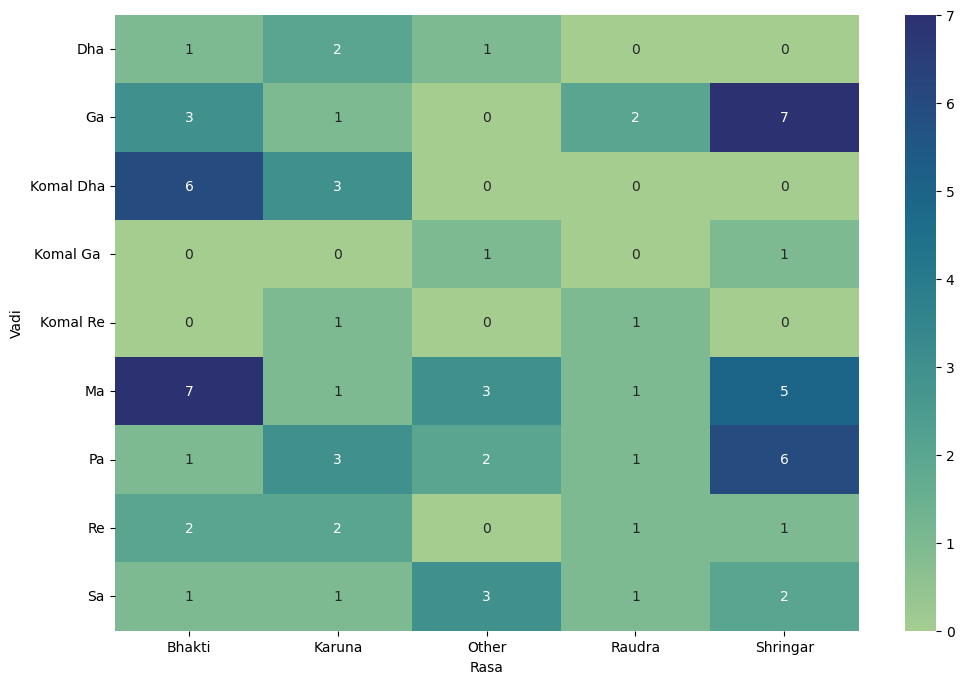

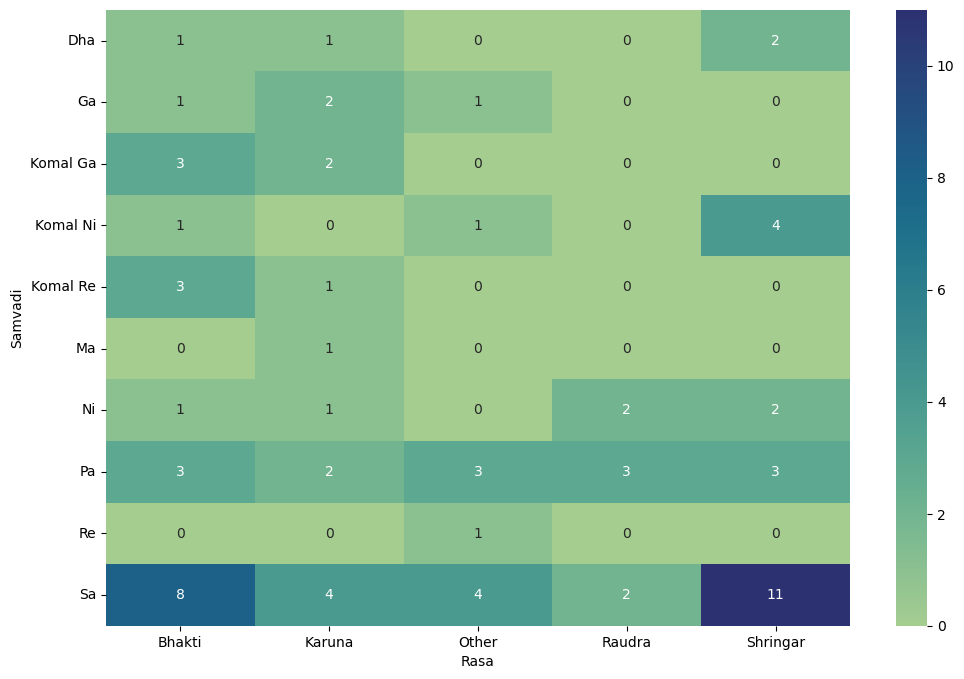

In [481]:
#Chi square test between swara distribution and rasa type

from scipy.stats import chi2_contingency

contigency_vadi_rasa= pd.crosstab(raga_rasa['Vadi'], raga_rasa['ALT_Rasa2'])
contigency_samvadi_rasa = pd.crosstab(raga_rasa['Samvadi'], raga_rasa['ALT_Rasa2'])

contigency_vadi_rasa.columns.name = 'Rasa'
contigency_samvadi_rasa.columns.name = 'Rasa'


print(contigency_vadi_rasa.columns.name)
# contigency_samvadi_rasa.columns = 


display(contigency_vadi_rasa)
display(contigency_samvadi_rasa)
#vadi and rasa

plt.figure(figsize=(12,8))
sns.heatmap(contigency_vadi_rasa, annot=True, cmap="crest")

c, p, dof, expected = chi2_contingency(contigency_vadi_rasa)
print("Vadi and Rasa:", p, dof, c)


#Samvadi and rasa

plt.figure(figsize=(12,8))
sns.heatmap(contigency_samvadi_rasa, annot=True, cmap="crest")

c, p, dof, expected = chi2_contingency(contigency_samvadi_rasa)
print("Samvadi and Rasa:", p, dof, c)

In [45]:
rasa_groups = [f'Shringar(N={len(shringar)})', f'Karuna(N={len(karuna)})', f'Bhakti(N={len(bhakti)})', f'Raudra(N={len(raudra)})', f'Others(N={len(others)})']


sample_lower_triangles = []
num_simulations = 100 #num of monte carlo runs

for i in range(num_simulations):
    sample = raga_rasa.sample(n=int(av)).reset_index()[['Raga', 'FileName', 'Vadi', 'Samvadi', 'Rasa', 'ALT_Rasa', 'ALT_Rasa2']]
#     display(sample)
    wd_dist=func(sample,f"random {i}", heatmap=False)
    lower = wd_dist[np.tril(wd_dist)!=0]
    sample_lower_triangles.append(lower)
    
np.mean(sample_lower_triangles)

random 0
random 1
random 2
random 3
random 4
random 5
random 6
random 7
random 8
random 9
random 10
random 11
random 12
random 13
random 14
random 15
random 16
random 17
random 18
random 19
random 20
random 21
random 22
random 23
random 24
random 25
random 26
random 27
random 28
random 29
random 30
random 31
random 32
random 33
random 34
random 35
random 36
random 37
random 38
random 39
random 40
random 41
random 42
random 43
random 44
random 45
random 46
random 47
random 48
random 49
random 50
random 51
random 52
random 53
random 54
random 55
random 56
random 57
random 58
random 59
random 60
random 61
random 62
random 63
random 64
random 65
random 66
random 67
random 68
random 69
random 70
random 71
random 72
random 73
random 74
random 75
random 76
random 77
random 78
random 79
random 80
random 81
random 82
random 83
random 84
random 85
random 86
random 87
random 88
random 89
random 90
random 91
random 92
random 93
random 94
random 95
random 96
random 97
random 98
random 99


5.830641025641025

In [46]:
np.round(np.mean(sample_lower_triangles), 2), np.round(np.std(sample_lower_triangles), 2)

(5.83, 3.91)

5.830641025641025


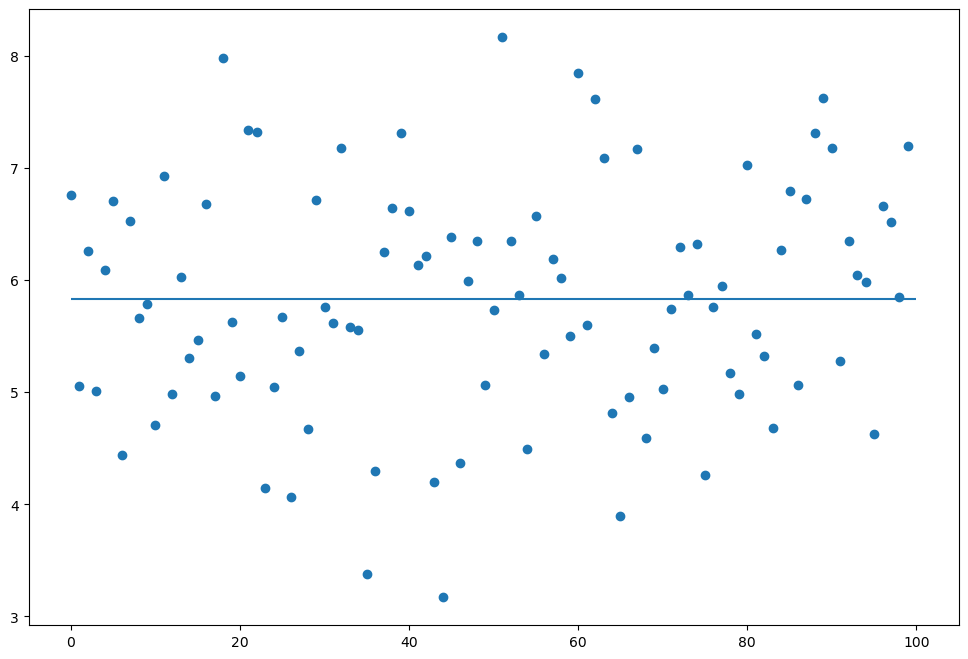

{'whiskers': [<matplotlib.lines.Line2D at 0x168b19190>,
 'caps': [<matplotlib.lines.Line2D at 0x168b199a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168b19430>],
 'medians': [<matplotlib.lines.Line2D at 0x168bb7e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x168bb7a30>],
 'means': []}

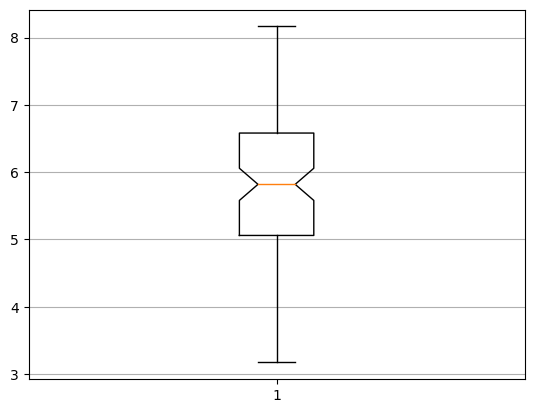

In [47]:
mean_all_runs = []
for i in range(len(sample_lower_triangles)):
    WD_each_sample = sample_lower_triangles[i]
    mean_all_runs.append(np.mean(WD_each_sample))
plt.figure(figsize=(12,8))

print(np.mean(mean_all_runs))
plt.plot(mean_all_runs, 'o')
plt.hlines(np.mean(mean_all_runs), xmin=0, xmax=100)

plt.show()

plt.grid(axis = 'y')
plt.boxplot(mean_all_runs, 'o') 

    

Text(2.5, 10, '$\\mu=5.67,\\ \\sigma=3.84$')

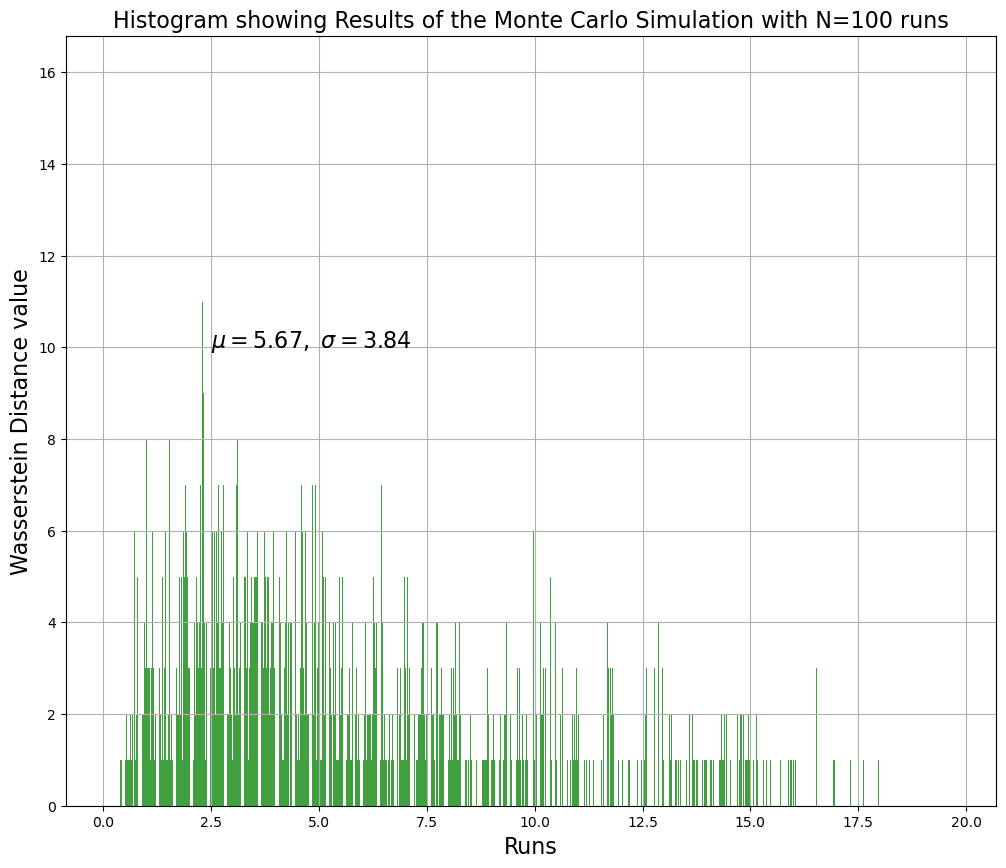

In [48]:
plt.figure(figsize=(12, 10))

n, bins, patches = plt.hist(sample_lower_triangles, 50, facecolor='g', alpha=0.75)
plt.grid()

plt.xlabel('Runs' , fontsize=16)
plt.ylabel('Wasserstein Distance value' , fontsize=16)
plt.title('Histogram showing Results of the Monte Carlo Simulation with N=100 runs' , fontsize=16)
plt.text(2.5, 10, r'$\mu=5.67,\ \sigma=3.84$', fontsize=16)





In [49]:
rasa_groups

['Shringar(N=22)',
 'Karuna(N=14)',
 'Bhakti(N=21)',
 'Raudra(N=7)',
 'Others(N=10)']

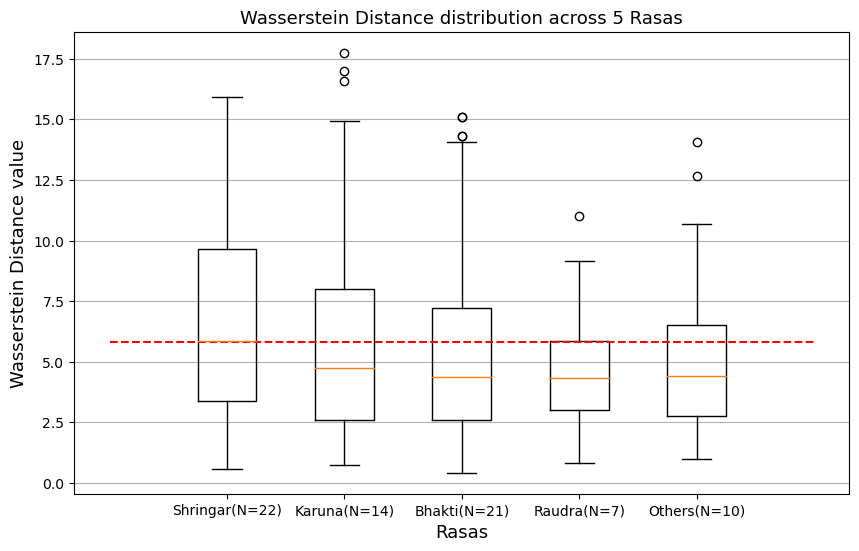

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(lower_triangles)
plt.xticks([1,2,3,4, 5],rasa_groups[:5])
plt.hlines(np.mean(sample_lower_triangles), xmin=0, xmax=6, colors="red", linestyles='dashed')

plt.grid(axis = 'y')
plt.title('Wasserstein Distance distribution across 5 Rasas', fontsize=13)
plt.ylabel('Wasserstein Distance value', fontsize=13)
plt.xlabel('Rasas', fontsize=13)

plt.savefig('imgs/monte_carlo.png')


## Plot with bi-gram and tri-gram

In [51]:
def get_token_tallies_new(file):
    if exists(file)==False:
        return -1
    with open(file, 'r') as f:
        lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].strip().replace("—", '').replace("~", '').replace("q7-", '7-').replace("h7", '7').replace("q1", '1').replace("F4", '4').replace("h4", '4+').strip() 
    
    return lines

In [52]:
from scipy.stats import wasserstein_distance as wd

def find_ngrams(input_list, n):
    ngrams = zip(*[input_list[i:] for i in range(n)])
#     print(list(ngrams)) 
    return ngrams

def ngram_distribution_per_raga(rasa_dataframe, keys):
   
    raga_names = []
    
    ngram_dist = np.zeros((len(rasa_dataframe), len(keys)))
    
    for i in rasa_dataframe.index:
        path = 'Analysis/deg_files/'+str(rasa_dataframe['FileName'].loc[i])+'.deg'
        rasa_lines = get_token_tallies_new(path)
        if rasa_lines == -1:
            continue
        raga_names.append(rasa_dataframe['Raga'].loc[i])
        
        rasa_lines = [line for line in rasa_lines if not re.search(r'[\*!]', line)]
        
        raga_ngram = list(find_ngrams(rasa_lines, n))
        
        scale_deg_dist_rasa = tally_array(raga_ngram, keys)
        ngram_dist[i] = scale_deg_dist_rasa
#         print(rasa_dataframe['FileName'].loc[i], ":", scale_deg_dist_rasa)
    
    return ngram_dist, raga_names

def tally_array(file_with_lines, keys):
    w = Counter(file_with_lines)
    scale_degree_frequency=np.zeros(len(keys))
    for i in range(len(keys)):
        if keys[i] in w.keys():
            scale_degree_frequency[i] = w[keys[i]]
    return scale_degree_frequency.astype(int)
    
def nfunc(rasa_df, rasa_name, n, keys, heatmap=False, clustermap = False):

    ngram_dist, raga_names = ngram_distribution_per_raga(rasa_df, keys)
    
    l = len(ngram_dist)
    dist=np.zeros((l,l))
    for i in range(len(ngram_dist)):
        p = ngram_dist[i]
        
        for j in range(len(ngram_dist)):
            q = ngram_dist[j]
            dist[i][j] = wd(p,q)
#             print(f"p:{p} \nq:{q}\nDist:{dist[i][j]}")
    
    if heatmap == True:
        plot_heatmap_ngram(dist, raga_names, rasa_name, n)
    if clustermap == True:
        plot_heatmap(dist, raga_names, rasa_name)
    return dist

def plot_heatmap_ngram(ndarray, raga_names, rasa_name, n):
    plt.figure(figsize=(14, 14))
    heatmap = sns.heatmap(ndarray, annot=True, vmin=np.min(ndarray), vmax=np.max(ndarray), 
                          cmap="crest",linewidth=.5, 
                          xticklabels = raga_names,
                          yticklabels = raga_names);
    title = 'Earth Movers distance : '+ str(len(raga_names)) +' ragas from '+rasa_name+' rasa'

    heatmap.set_title(title,
                      fontdict={'fontsize':16}, pad=12);

    heatmap.set_xlabel('Ragas', fontsize=16)
    heatmap.set_ylabel('Ragas', fontsize=16)
    
    plt.savefig(f'imgs/{rasa_name}_{n}_gram.png')
    plt.show()

### Get ngram keys and values for n=2,3

In [53]:
def get_ngram_key_vals(n):
    
    file_with_lines = []

    rasa_dataframe = raga_rasa
    raga_names = []
    for i in rasa_dataframe.index:
        path = 'Analysis/deg_files/'+str(rasa_dataframe['FileName'].loc[i])+'.deg'
        ngram_counts = get_token_tallies_new(path)
        if ngram_counts == -1:
            continue
        raga_names.append(rasa_dataframe['Raga'].loc[i])
        ngram_counts = [line for line in ngram_counts if not re.search(r'[\*!OTL:]', line)]
        file_with_lines.append(list(find_ngrams(ngram_counts, n)))

    flat_list = [item for sublist in file_with_lines for item in sublist]
    flat_list
    w = Counter(flat_list)
    w = OrderedDict(sorted(w.items()))
    scale = w.keys()
    all_items = list(w.items())

    #removing tuples with ''
    new = []
    new_keys = []
    new_vals = []
    if n == 2:
        for i in range(len(all_items)):
            if all_items[i][0][0] == '' or all_items[i][0][1] == '':
                continue
            else:
                new.append(all_items[i])
                new_keys.append(all_items[i][0])
                new_vals.append(all_items[i][1])
    if n == 3:
        for i in range(len(all_items)):
            if all_items[i][0][0] == '' or all_items[i][0][1] == '' or all_items[i][0][2] == '':
                continue
            else:
                new.append(all_items[i])
                new_keys.append(all_items[i][0])
                new_vals.append(all_items[i][1])


    return new_keys, new_vals


bigram_keys, bigram_vals = get_ngram_key_vals(2)
trigram_keys, trigram_vals = get_ngram_key_vals(3)
len(trigram_keys), len(bigram_keys)


(797, 128)

### 2gram

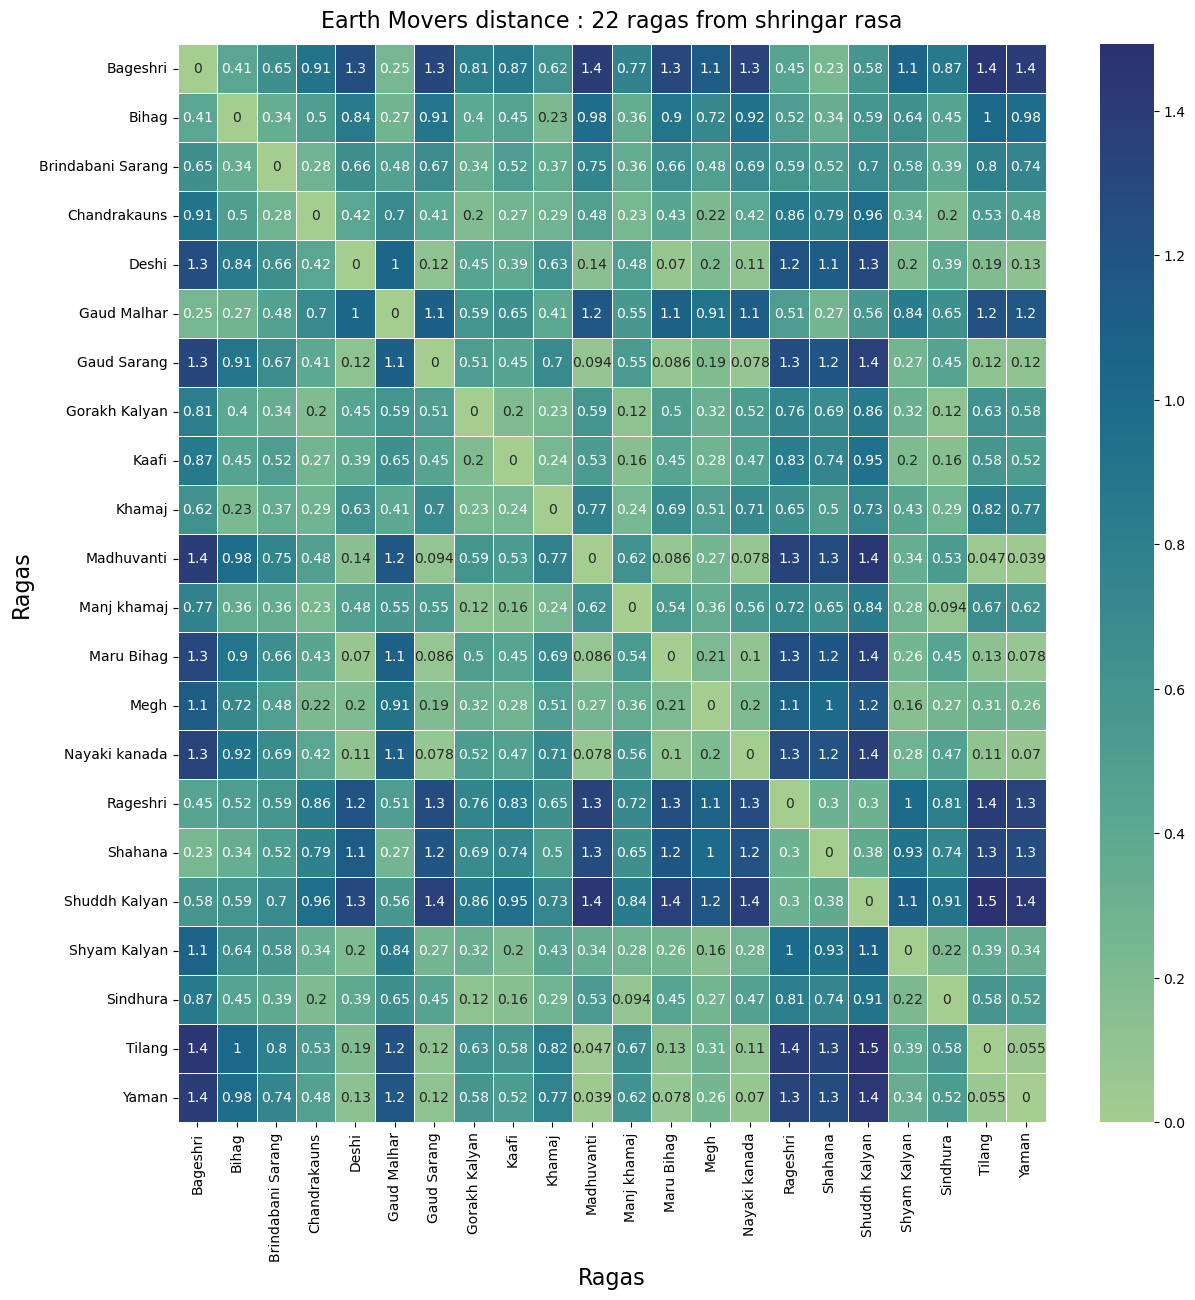

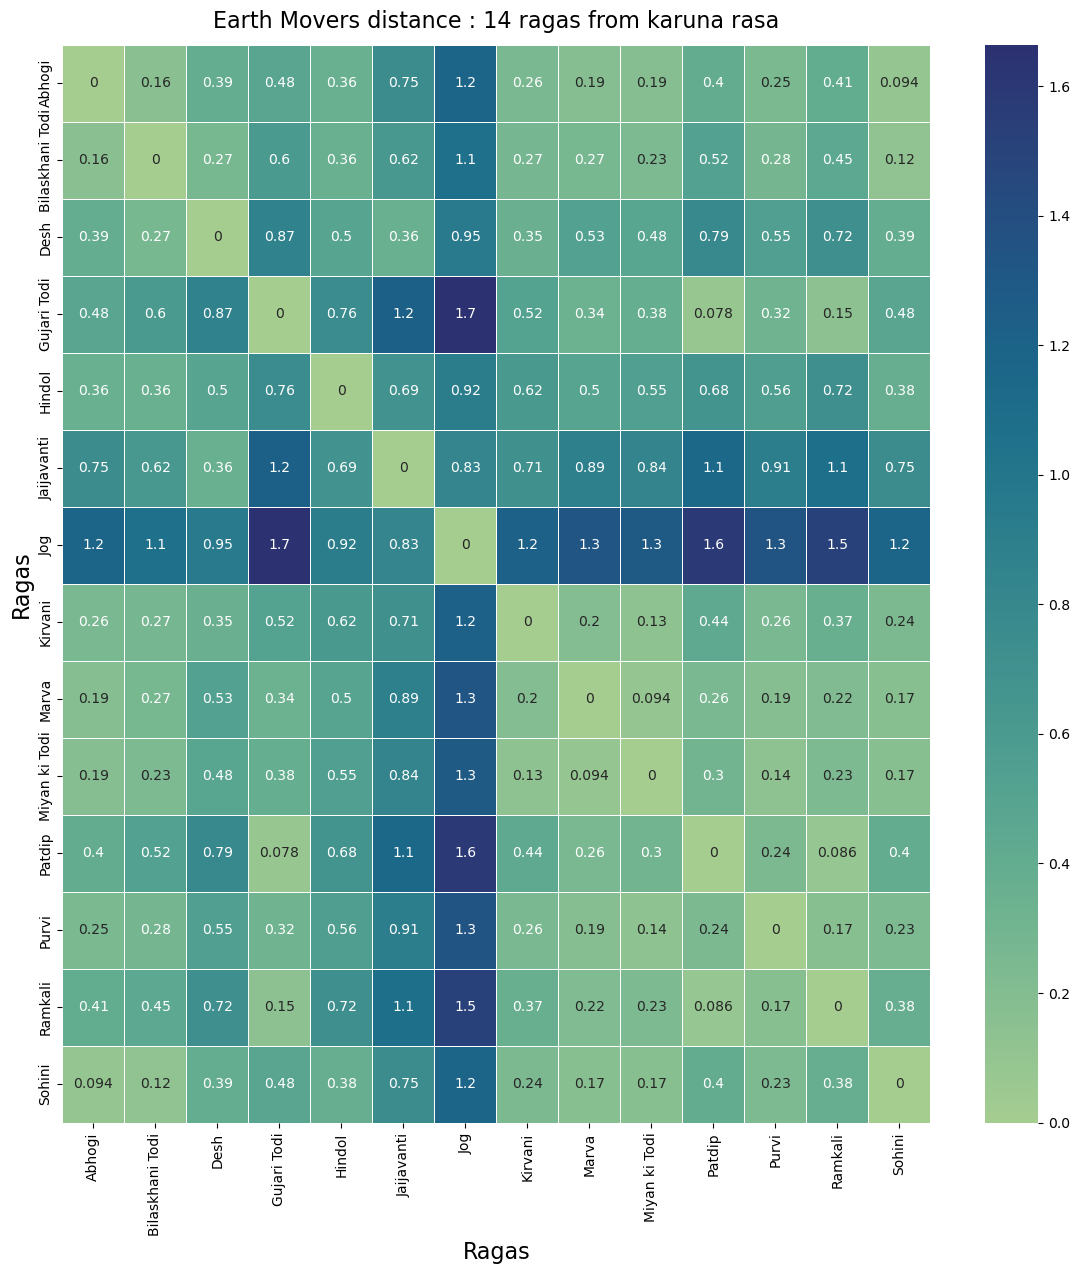

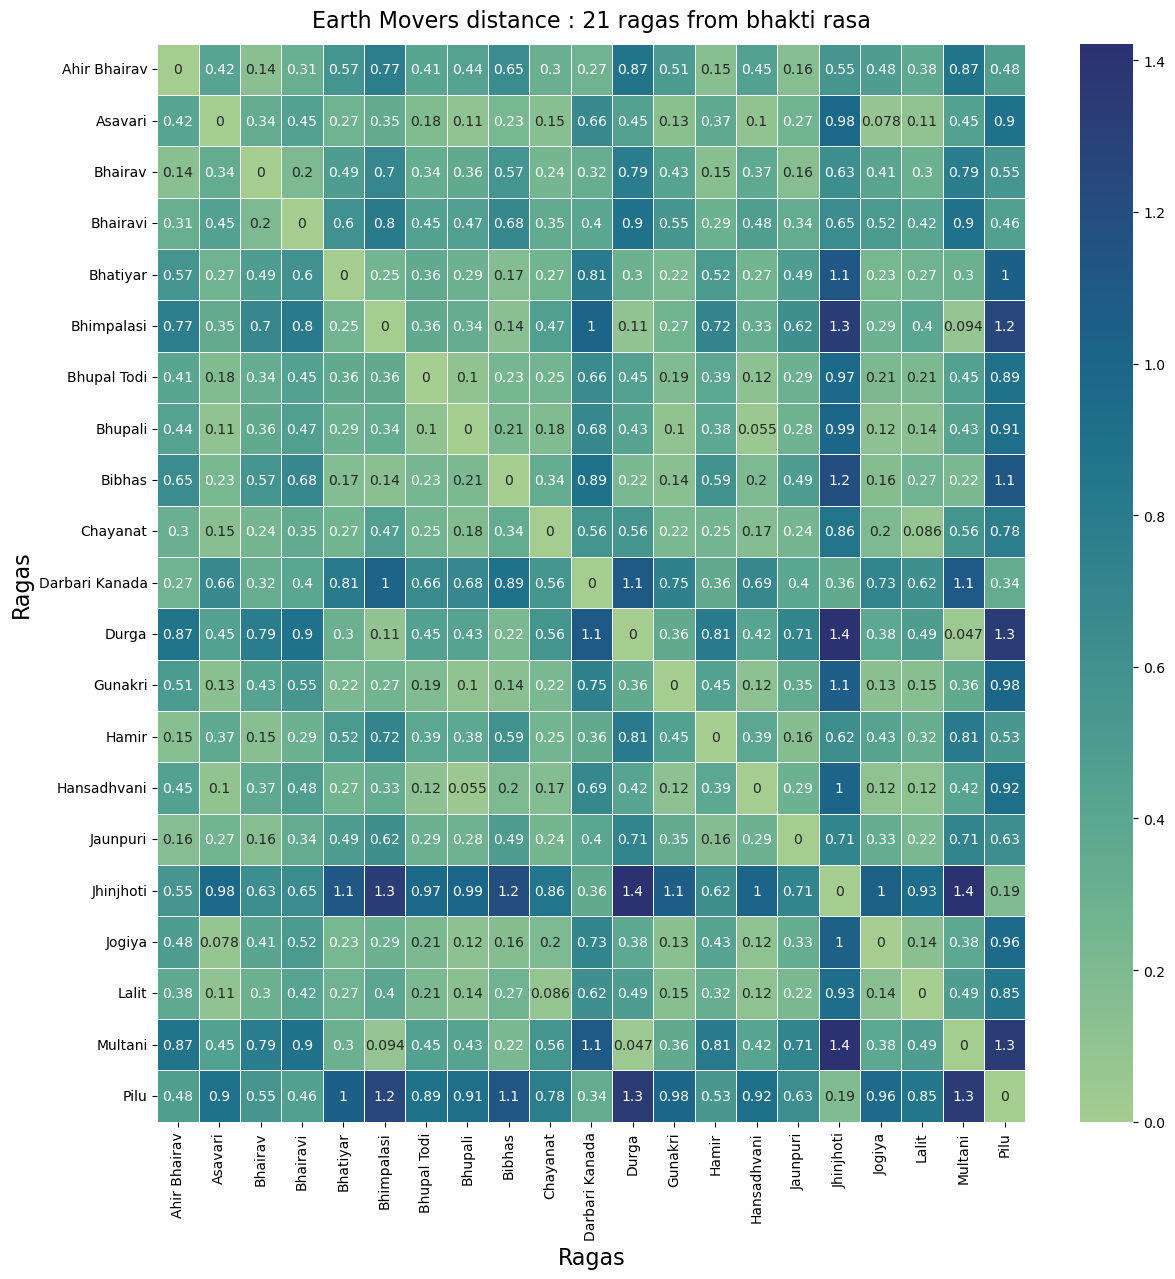

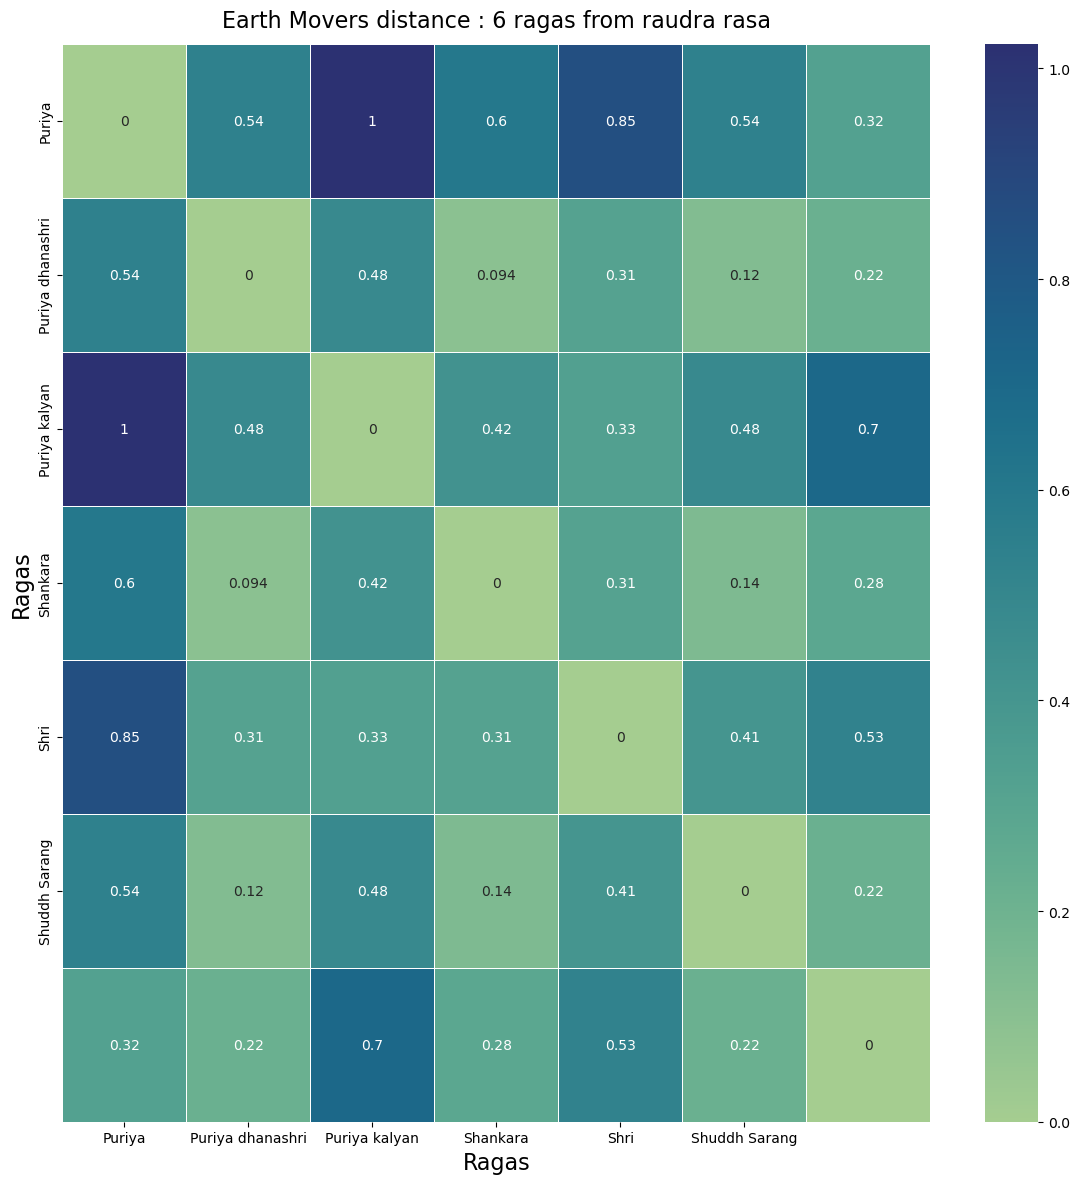

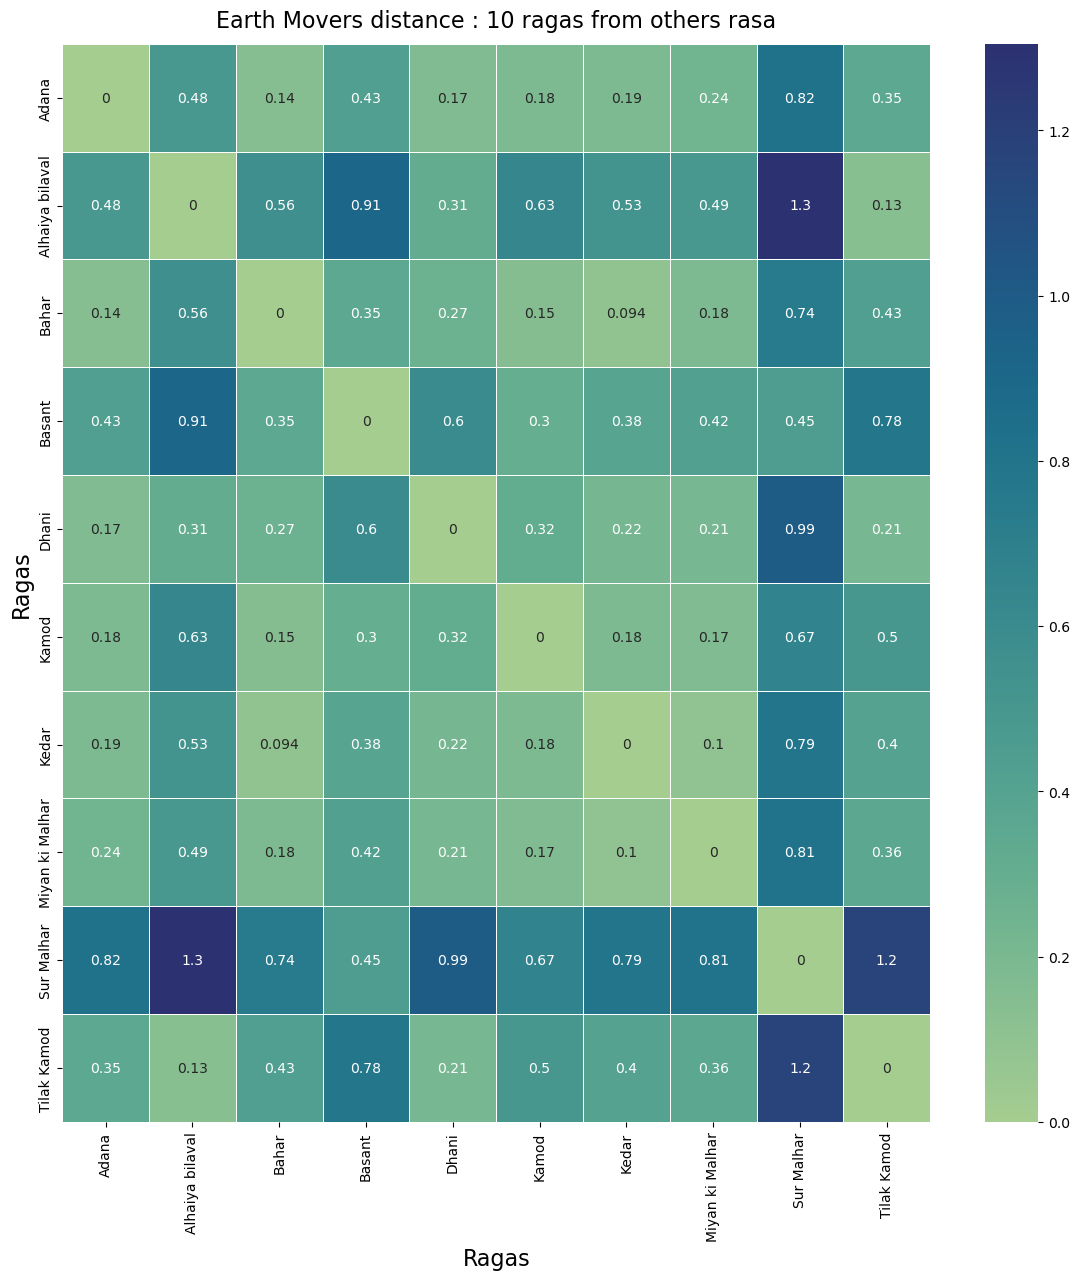

0
1
2
3
4
0.5195392628205128


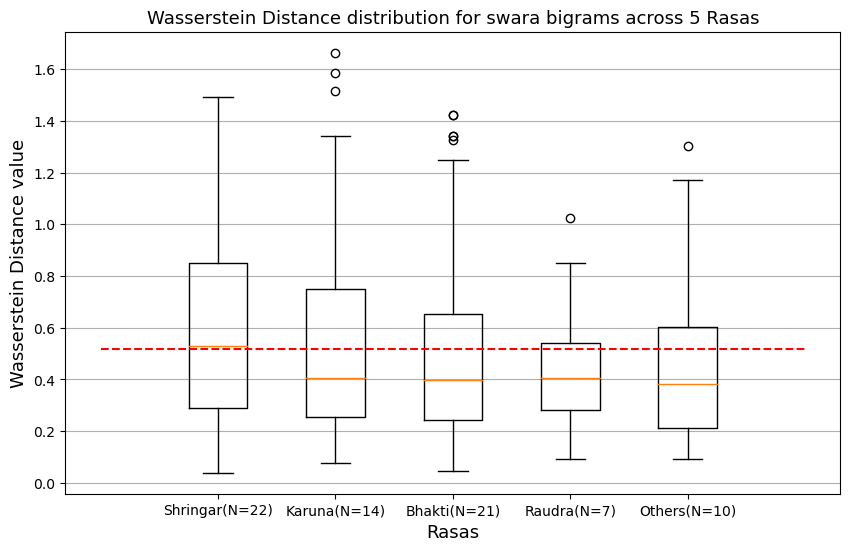

In [54]:
n=2
rasa_groups = ['shringar', 'karuna', 'bhakti', 'raudra', 'others']
rasa_df_arr = [shringar, karuna, bhakti, raudra, others]
dists2g = []
for i in range(len(rasa_groups)):
    dists2g.append(nfunc(rasa_df_arr[i],rasa_groups[i], n, bigram_keys, heatmap = True))
    
dists_2g_np = np.array(dists2g)     

med = []
lower_triangles2g = []

for i in range(len(dists_2g_np)):
    print(i)
    plotting = dists_2g_np[i][np.tril(dists_2g_np[i])!=0]
    med.append(np.median(plotting))
    lower_triangles2g.append(plotting)

#monte carlo for 2g

rasa_groups = [f'Shringar(N={len(shringar)})', f'Karuna(N={len(karuna)})', f'Bhakti(N={len(bhakti)})', f'Raudra(N={len(raudra)})', f'Others(N={len(others)})']
av = 13.0
n=2
sample_lower_triangles_2g = []
num_simulations = 100 #num of monte carlo runs

for i in range(num_simulations):
    sample = raga_rasa.sample(n=int(av)).reset_index()[['Raga', 'FileName', 'Vadi', 'Samvadi', 'Rasa', 'ALT_Rasa', 'ALT_Rasa2']]
    wd_dist=nfunc(sample,f"random {i}", n, bigram_keys, heatmap=False)
    lower = wd_dist[np.tril(wd_dist)!=0]
    sample_lower_triangles_2g.append(lower)
    
print(np.mean(sample_lower_triangles_2g))

#distribution of all randomly sampled means
# plt.figure(figsize=(12, 10))

# n, bins, patches = plt.hist(sample_lower_triangles_2g, 50, facecolor='g', alpha=0.75)
# plt.grid()

# plt.xlabel('Runs' , fontsize=16)
# plt.ylabel('Wasserstein Distance value' , fontsize=16)
# plt.title('Histogram showing Results of the Monte Carlo Simulation with N=100 for swara bigrams distributions' , fontsize=16)
# plt.text(.25, 12, r'$\mu=5.67,\ \sigma=3.84$', fontsize=16)


#RANDOM SAMPLE DISTRIBUTION
mean_all_runs = []
for i in range(len(sample_lower_triangles_2g)):
    WD_each_sample = sample_lower_triangles_2g[i]
    mean_all_runs.append(np.mean(WD_each_sample))


#BOXPLOT WITH ALL RASAS AND RANDOM SAMPLE
plt.figure(figsize=(10, 6))
plt.boxplot(lower_triangles2g)
plt.xticks([1,2,3,4, 5],rasa_groups[:5])
plt.hlines(np.mean(sample_lower_triangles_2g), xmin=0, xmax=6, colors="red", linestyles='dashed')

plt.grid(axis = 'y')
plt.title('Wasserstein Distance distribution for swara bigrams across 5 Rasas', fontsize=13)
plt.ylabel('Wasserstein Distance value', fontsize=13)
plt.xlabel('Rasas', fontsize=13)

plt.savefig('imgs/WD_all_with_monte_carlo_2_gram.png')


### 3gram

0.08306437602548015


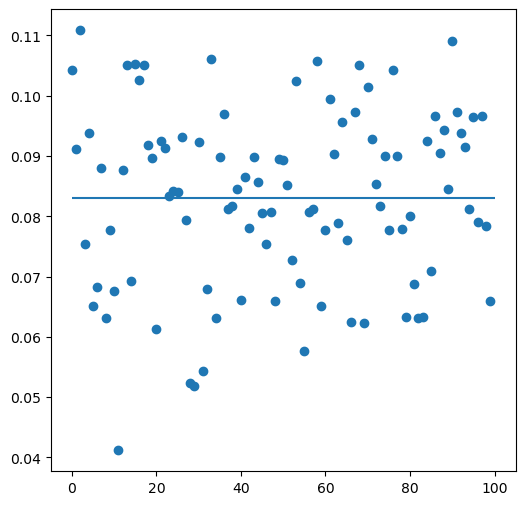

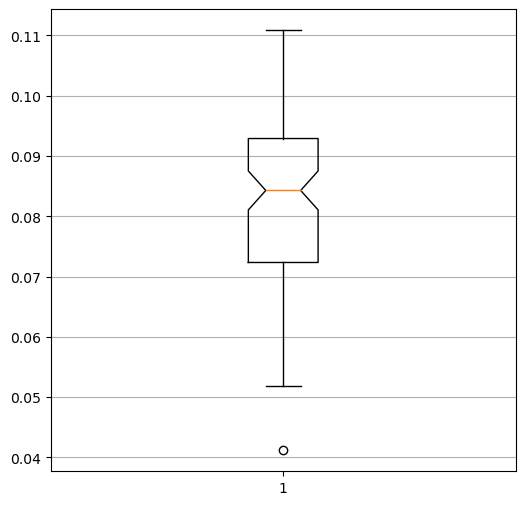

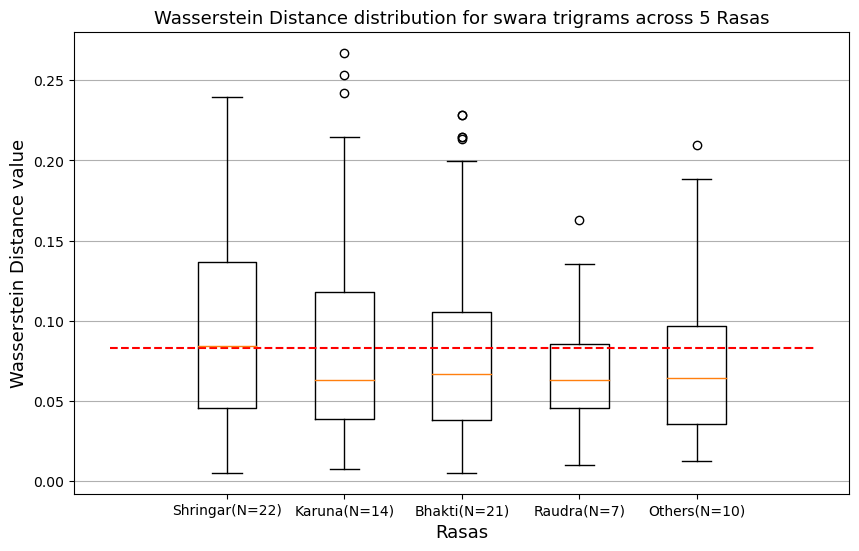

In [55]:
#Wasserstein matrices for 3g


n=3
rasa_groups = ['shringar', 'karuna', 'bhakti', 'raudra', 'others']
rasa_df_arr = [shringar, karuna, bhakti, raudra, others]
dists3g = []
for i in range(len(rasa_groups)):
    dist = nfunc(rasa_df_arr[i],rasa_groups[i], n, trigram_keys)
#     print(dist)
    dists3g.append(dist)
    
dists_3g_np = np.array(dists3g)  

med = []
lower_triangles3g = []

for i in range(len(dists_3g_np)):
    
    plotting = dists_3g_np[i][np.tril(dists_3g_np[i])!=0]
    med.append(np.median(plotting))
    lower_triangles3g.append(plotting)


rasa_groups = [f'Shringar(N={len(shringar)})', f'Karuna(N={len(karuna)})', f'Bhakti(N={len(bhakti)})', f'Raudra(N={len(raudra)})', f'Others(N={len(others)})']

n=3
sample_lower_triangles_3g = []
num_simulations = 100 #num of monte carlo runs

for i in range(num_simulations):
    sample = raga_rasa.sample(n=int(av)).reset_index()[['Raga', 'FileName', 'Vadi', 'Samvadi', 'Rasa', 'ALT_Rasa', 'ALT_Rasa2']]
    wd_dist_3g=nfunc(sample,f"random {i}", n, trigram_keys, heatmap=False)
    lower_3g = wd_dist_3g[np.tril(wd_dist_3g)!=0]
    sample_lower_triangles_3g.append(lower_3g)
    
np.mean(sample_lower_triangles_3g)


#RANDOM SAMPLE DISTRIBUTION
mean_all_runs_3g = []
for i in range(len(sample_lower_triangles_3g)):
    WD_each_sample = sample_lower_triangles_3g[i]
    mean_all_runs_3g.append(np.mean(WD_each_sample))

print(np.mean(mean_all_runs_3g))
plt.figure(figsize=(6,6))
plt.plot(mean_all_runs_3g, 'o')
plt.hlines(np.mean(mean_all_runs_3g), xmin=0, xmax=100)

plt.show()
plt.figure(figsize=(6,6))
plt.grid(axis = 'y')
plt.boxplot(mean_all_runs_3g, 'o') 


#BOXPLOT WITH ALL RASAS AND RANDOM SAMPLE
plt.figure(figsize=(10, 6))
plt.boxplot(lower_triangles3g)
plt.xticks([1,2,3,4, 5],rasa_groups[:5])
plt.hlines(np.mean(sample_lower_triangles_3g), xmin=0, xmax=6, colors="red", linestyles='dashed')

plt.grid(axis = 'y')
plt.title('Wasserstein Distance distribution for swara trigrams across 5 Rasas', fontsize=13)
plt.ylabel('Wasserstein Distance value', fontsize=13)
plt.xlabel('Rasas', fontsize=13)

plt.savefig('imgs/WD_all_with_monte_carlo_3_gram.png')
